# Práctica 2: Aprendizaje automático

__Fecha de entrega: 27 de marzo de 2023__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 2 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

__Número de grupo: 15__

__Nombres de los estudiantes: Diego Rojas Rodríguez__

# Apartado 2: Clasificación

## 1) Carga del conjunto de datos

---



En este notebook trabajaremos con un conjunto de datos con diferentes características médicas de personas. El objetivo es establecer un diagnóstico sobre si tiene dolor lumbar o no.

Las variables del conjunto de datos son las siguientes: pelvic_incidence, pelvic_tilt, lumbar_lordosis_angle, sacral_slope, pelvic_radius, degree_spondylolisthesis, pelvic_slope, Direct_tilt, thoracic_slope, cervical_tilt, sacrum_angle, scoliosis_slope.

Crea un dataframe a partir del fichero `lower_back_pain_dataset2.csv` que se proporciona junto con la práctica.



In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/IA2/p2/lower_back_pain_dataset2.csv')
print(df)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0           63.027817    22.552586              39.609117     40.475232   
1           39.056951    10.060991              25.015378     28.995960   
2           68.832021    22.218482              50.092194     46.613539   
3           69.297008    24.652878              44.311238     44.644130   
4           49.712859     9.652075              28.317406     40.060784   
..                ...          ...                    ...           ...   
305         47.903565    13.616688              36.000000     34.286877   
306         53.936748    20.721496              29.220534     33.215251   
307         61.446597    22.694968              46.170347     38.751628   
308         45.252792     8.693157              41.583126     36.559635   
309         33.841641     5.073991            

## 2) Análisis de los datos

Comprueba si las clases a predecir están equilibradas y explica cómo afecta tener o no clases equilibradas a la hora de entrenar y evaluar un modelo.

Calcula la correlación de las variables con la variable `Class_att`. ¿Cuáles tienen mayor correlación con la variable de salida? ¿Qué conclusiones puedes extraer?

Comprueba los rangos y distribuciones de las variables numéricas con mayor correlación con la variable `Class_att`. Dibuja el diagrama de dispersión entre cada par de variables asignando un color diferente a los puntos que se corresponden con cada una de las 2 categorías a predecir. ¿Hay pares de variables que separen bien las clases?

A tenor de todo el análisis, ¿crees que va a ser un problema sencillo o complicado de resolver?

Frecuencia de clases: 
Abnormal    210
Normal      100
Name: Class_att, dtype: int64


<Axes: >

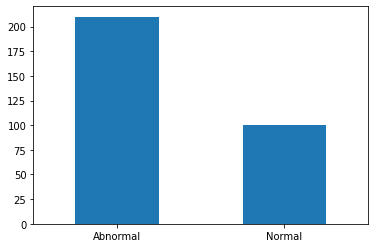

In [ ]:
counts = pd.value_counts(df['Class_att'], sort=True)
print("Frecuencia de clases: ")
print(counts)
counts.plot(kind = 'bar', rot=0)
#Al separar los datos en clases y asignar a la solucion una de ellas podemos decir que nos encontramos ante un problema de clasificación
#Podemos ver facilmente que las clases Normal y Abnormal estan desbalanceadas
#Esto le va a generar cierta tendencia al modelo a predecir que el paciente está enfermo porque en la mayoría de los
#ejemplos de su entrenamiento el paciente estaba enfermo. Si el modelo solo predijese Abnormal acertaría 2 de cada
#3 veces. Como los datos de Normal son menores tendrá más dificultades para clasificar a este tipo de pacientes
#Esto puede ser un problema sobre todo en un sistema como este que es del ámbito médico. Diagnosticar falsos
#positivos puede causar preocupaciones innecesarias a los pacientes.

In [ ]:
#Antes de comprobar correlciones hay que convertir la variable categórica Class_att en numérica (Normal: 1, Abnormal: 0)
df['Class_att'] = df['Class_att'].astype('category').cat.codes
df[df.columns[1:]].corr()['Class_att'][:]
#De estos valores de correlación podemos ver cuanto influye cada variable en determinar si un paciente padece o no dolor lumbar
#Todos los valores parecen bajos pero por ejemplo podemos suponer que a mayor grado de spondylolisthesis más probable es que
#el paciente padezca dolor lumbar (relacion inversamente proporcional -0.443678)
#Otros datos relacionados con la clase Abnormal: pelvic_tilt, lumbar_lordosis_angle, sacral_slope, cervical_tilt
#La unica relacion directa significativa con la clase Normal parece pelvic_radius
#Todos los datos se muestran debajo

pelvic_tilt                -0.326063
lumbar_lordosis_angle      -0.312484
sacral_slope               -0.210602
pelvic_radius               0.309857
degree_spondylolisthesis   -0.443687
pelvic_slope               -0.055865
Direct_tilt                 0.039591
thoracic_slope              0.049354
cervical_tilt              -0.100044
sacrum_angle               -0.026887
scoliosis_slope             0.069315
Class_att                   1.000000
Name: Class_att, dtype: float64

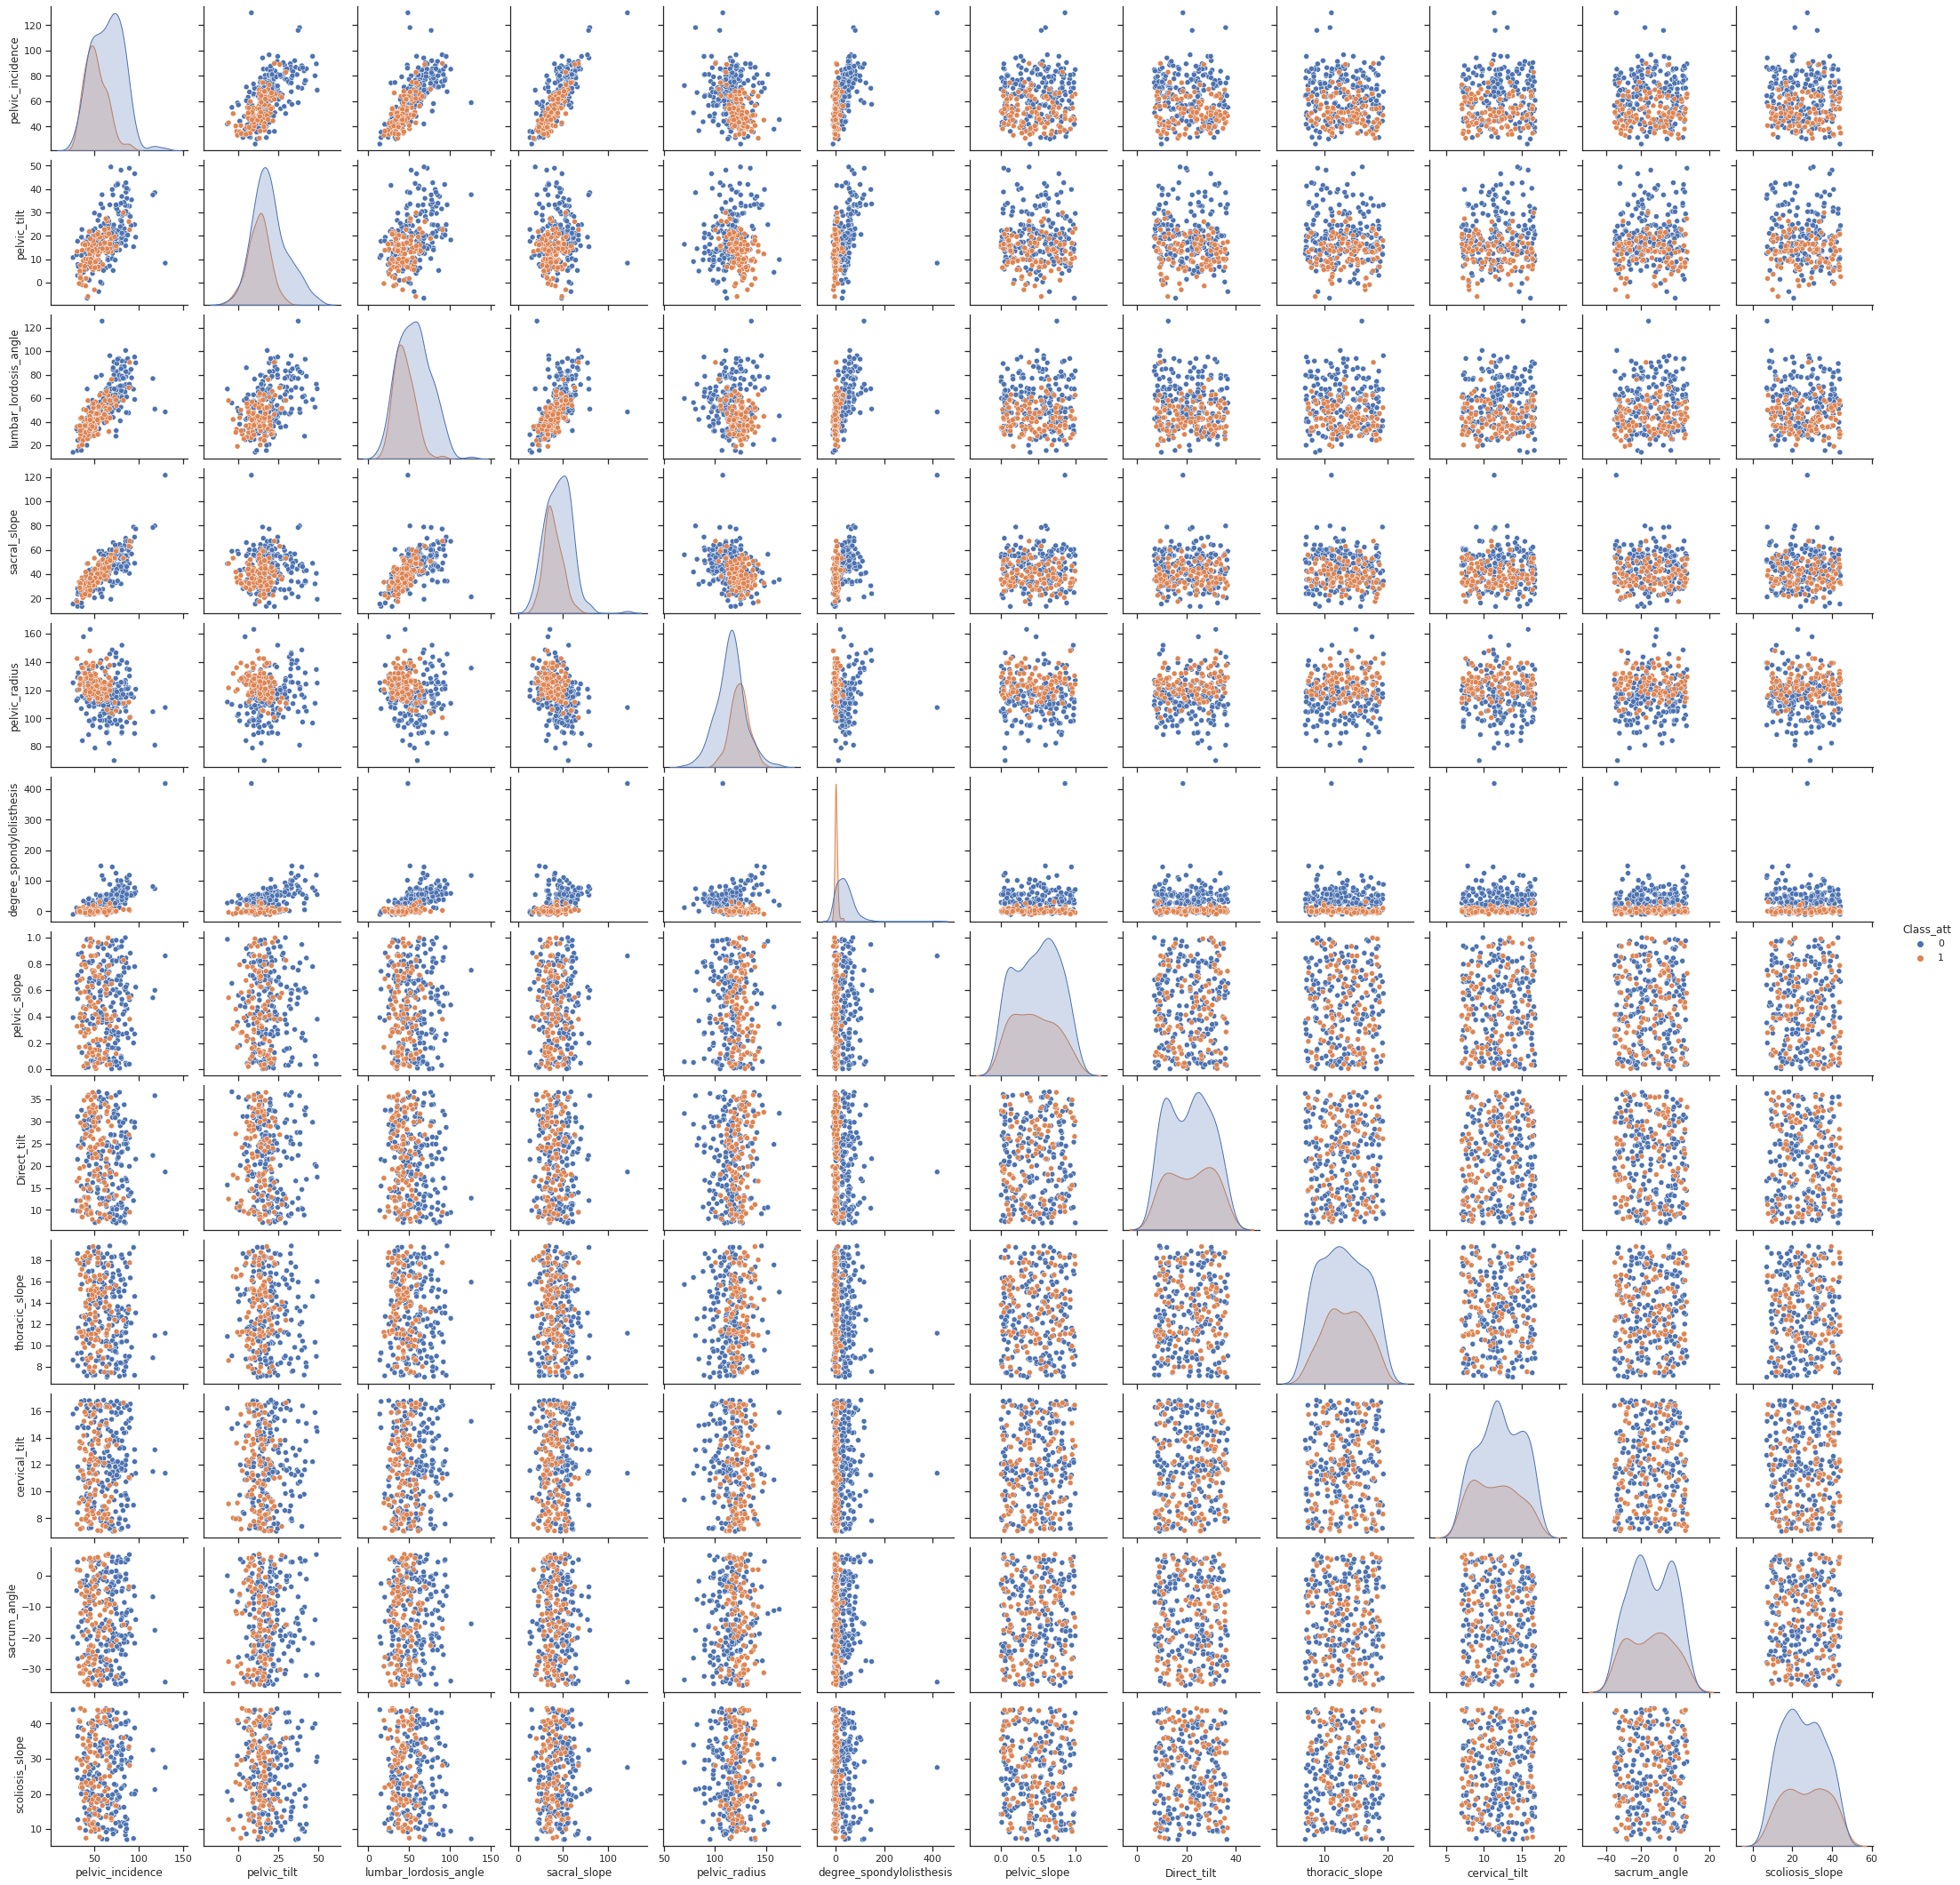

In [ ]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
%matplotlib inline
sns.pairplot(df, hue="Class_att")
#He tenido que usar la libreria seaborn porque el método scatter_matrix daba error con los colores

In [ ]:
#Revisando por encima la iamgen podemos ver que el grado de spondylolisthesis separa bastante bien los datos
#Otros datos como el grado del sacrum no aportan casi información
#Los diagramas muestran claramente como las variables mencionadas anteriormente distribuyen relativamente bien los datos mientras
#que las demas son una mezcla homogenea entre las dos clases
#Las variables del cuadrante superior izquierdo parecen separables por una curva sencilla (Aunque tienen mucho, quiza demasiado, solapamiento)
#Las del cuadrante inferior izquierdo por una recta
#Las del cuadrante superior derecho superior e inferior no parecen separables

## 3) Árboles de decisión

Aplica árboles de decisión para resolver el problema



### 3.1) Normalización de los datos

Decide razonadamente si es necesario escalar o estandarizar los datos.

In [ ]:
#Si observamos los datos podemos ver que los valores originales dependiendo de la variable son muy distintos (sacrum_angle[-30, 10], degree_spondylolisthesis[0,400])
#Esto puede perjudicar durante el entrenamiento porque los datos estarán demasiado dispersos
#Si aprende que una variacion normal esta entre 1 y 10 pero tiene un dato a 400 puede acabar clasificando mal
#Por eso conviene estandarizar todos los datos para que operen en el mismo rango
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler() #Por defecto ajustara a mínimo 0 y máximo 1
df_scaled = min_max_scaler.fit_transform(df.drop(columns=['Class_att']))  #Eliminamos el atributo del escalado para usarlo mas tarde por separado
print(df_scaled)
#Podemos ver que ahora todos los valores estan en el rango [0,1]

[[0.35568788 0.51989984 0.22917997 ... 0.84511485 0.15686136 0.9777973 ]
 [0.12450104 0.2967831  0.09857833 ... 0.99630049 0.2308778  0.24381182]
 [0.41166648 0.51393229 0.32299466 ... 0.98344208 0.14802577 0.32716636]
 ...
 [0.34043781 0.52244298 0.28789745 ... 0.19050343 0.91936458 0.30555027]
 [0.18425678 0.27235174 0.24684569 ... 0.27870135 0.97149127 0.71548189]
 [0.07420202 0.20770855 0.20261992 ... 0.68420445 0.87720937 0.89992045]]


### 3.2) Optimizando el número mínimo de ejemplos para dividir un nodo

En este apartado vamos a entrenar nuestro clasificador e intentar dar con una parametrización que aprenda "lo justo", sin quedarse corto, ni sobreaprender.

Para ello, probaremos distintos árboles variando la profundidad máxima y usando validación cruzada en 10 partes.

Pinta las curvas de apredizaje para distintos valores de dicho parámetro en entrenamiento y validación. Analiza e interpreta las curvas (¿qué puedes decir de cómo varía el comportamiento de clasificador en entrenamiento y validación a medida que cambia el valor del parámetro?) y decide de manera razonada qué valor del parámetro es el que consideras más adecuado.

Los árboles que vas a entrenar deben utilizar la entropía como criterio de selección de variables.

Como sklearn trabaja con arrays, deberás acceder al array interno del dataframe. Crea un array que contenga sólo los datos de entrenamiento (sin la variable a predecir) y otro array que sólo contenga la variable a predecir. Usaremos __todas__ las variables del dataset para construir el árbol.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
#Tomaremos el estado aleatorio 420 para poder recuperar siempre los resultados en distintos intentos
x_train, x_test, class_train, class_test = train_test_split(df_scaled, df.Class_att, test_size=0.2, random_state=420)

for i in range(2,11):
  clf = DecisionTreeClassifier(max_depth=i, random_state=420)
  clf = clf.fit(x_train,class_train)
  class_pred = clf.predict(x_test)
  print("Prediccion con profundidad de árbol {}:".format(i))
  print(class_pred)
  scores = cross_val_score(clf, df_scaled, df.Class_att, cv=10, scoring='f1') #Validacion cruzada con F1
  print("Validación cruzada: {}".format(scores))
  #Vamos a probar distintas métricas para comparar los árboles
  print("Accuracy:",metrics.accuracy_score(class_test, class_pred)) #Numero de aciertos
  print("F1 Score:",metrics.f1_score(class_test, class_pred)) #Métrica F1 muy usada (se ajusta mejor cuando hay desigualdad en los valores como es nuestro caso)
  #Recordar de nuevo Normal: 1 Abnormal: 0

Prediccion con profundidad de árbol 2:
[1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1
 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1]
Validación cruzada: [0.33760684 0.53632479 0.6025641  0.60425532 0.92171717 0.63095238
 0.83152174 0.58666667 0.79738562 0.65934066]
Accuracy: 0.8225806451612904
F1 Score: 0.717948717948718
Prediccion con profundidad de árbol 3:
[1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1]
Validación cruzada: [0.33760684 0.48333333 0.6092437  0.66304348 0.79738562 0.76515152
 0.84343434 0.84343434 0.63529412 0.74728261]
Accuracy: 0.8387096774193549
F1 Score: 0.6666666666666667
Prediccion con profundidad de árbol 4:
[1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 1]
Validación cruzada: [0.4516129  0.61984392 0.71818182 0.76515152 0.84343434 0.76515152
 0.87843137 0.84343434 0.76515152 

In [ ]:
#Vemos que las mejores predicciones del árbol basándonos en varios tipos de medida son con profundidad 4
#Se puede a preciar que a partir de la profundidad 7 las métricas sont todas iguales porque hemos
#construido el árbol entero

### 3.3) Analizando el árbol de decisión

Crea un nuevo árbol de decisión con el parámetro elegido en el apartado anterior y dibújalo (si es muy profundo dibuja solamente los primeros niveles).

Obtén también la importancia de las variables, que es una agregación de su poder discriminante en los distintos nodos del árbol donde se usan (más info [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_)) y píntala en una gráfica.

Con esos gráficos, contesta lo siguiente:

- ¿Cuáles son las variables más importantes y en qué orden?
- ¿Hay variables del conjunto de datos que no se han usado?
- ¿Cuál sería la tasa de aciertos (_accuracy_) del árbol sobre el conjunto de entrenamiento si sólo hiciera una pregunta?
- ¿El árbol que has calculado es capaz de separar las clases?
- Si no has mostrado el árbol completo, en la parte que estás viendo, ¿qué clases se separan mejor o peor? ¿qué variables ayudan a discriminarlas?
- ¿En cuál de los nodos del segundo nivel del árbol existe mayor confusión (siendo la raíz el nivel 0)?

__Nota__: al dibujar el árbol con la función `plot_tree` el parámetro `class_names` espera recibir una serie de datos de tipo cadena. Puedes convertir la serie de categorías a una serie de cadenas usando `mi_serie.astype('str')`.


[Text(0.6190476190476191, 0.9, 'x[5] <= 0.06\nentropy = 0.916\nsamples = 248\nvalue = [166, 82]\nclass = Abnormal'),
 Text(0.38095238095238093, 0.7, 'x[4] <= 0.516\nentropy = 0.964\nsamples = 131\nvalue = [51, 80]\nclass = Normal'),
 Text(0.19047619047619047, 0.5, 'x[11] <= 0.564\nentropy = 0.958\nsamples = 50\nvalue = [31, 19]\nclass = Abnormal'),
 Text(0.09523809523809523, 0.3, 'x[9] <= 0.288\nentropy = 0.787\nsamples = 34\nvalue = [26, 8]\nclass = Abnormal'),
 Text(0.047619047619047616, 0.1, 'entropy = 0.98\nsamples = 12\nvalue = [5, 7]\nclass = Normal'),
 Text(0.14285714285714285, 0.1, 'entropy = 0.267\nsamples = 22\nvalue = [21, 1]\nclass = Abnormal'),
 Text(0.2857142857142857, 0.3, 'x[2] <= 0.196\nentropy = 0.896\nsamples = 16\nvalue = [5, 11]\nclass = Normal'),
 Text(0.23809523809523808, 0.1, 'entropy = 0.918\nsamples = 6\nvalue = [4, 2]\nclass = Abnormal'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.469\nsamples = 10\nvalue = [1, 9]\nclass = Normal'),
 Text(0.5714285714285714,

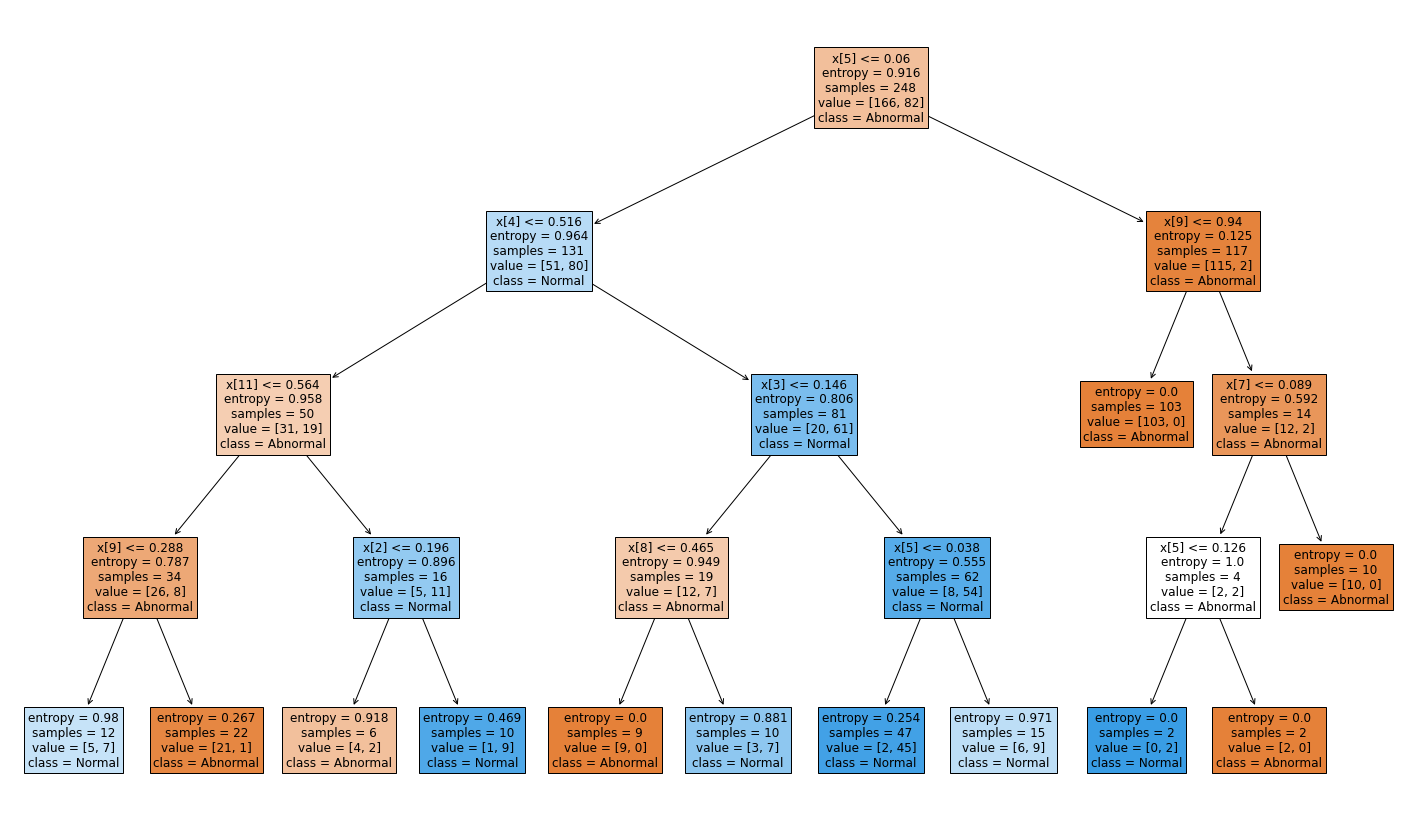

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

clf = tree.DecisionTreeClassifier(max_depth=4, criterion='entropy', random_state=420)
clf.fit(x_train,class_train)
plt.figure(figsize=(25,15))
tree.plot_tree(clf, filled=True, fontsize=12, class_names=['Abnormal', 'Normal'])  #Los colores indican la clase a la que pertenece cada nodo

In [ ]:
#Estamos tratando las variables en el orden en el que aparecen en nuestro dataframe
# x[0:14] = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'pelvic_slope', 'Direct_tilt', 'thoracic_slope', 'cervical_tilt', 'sacrum_angle', 'scoliosis_slope']
#Las decisiones más importantes del árbol son las primeras por lo que las variables con más peso son
# 5 -> 4, 9 -> 11, 3, 7 -> 2, 8, 5 en ese orden siendo cada numero el índice de la lista de arriba
#Esto significa que las variables 0, 1, 6, 10 ('pelvic_incidence', 'pelvic_tilt', 'pelvic_slope', 'sacrum_angle') no influyen en la clasificacion
#En el caso de que solo hicieramos una pregunta dependiendo del degree_spondylolisthesis determinariamos:
#Con un 47,7% de probabilidades irá a la rama derecha (117/241) que tiene preferencia por predecir Abnormal con un 98,3% de probabilidades
#Esto quiere decri que si tu degree_spondylolisthesis es mayor que 0.06 (valor normalizado) en un 98,3% de las ocasiones padeceras dolor lumbar
#Con un  52,8% de probabilidades irá a la rama izquierda (131/248) cuya distribución es en un 38,9% Abnormal y un 61,0% Normal
#Por lo que si tu degree_spondylolisthesis es menor que 0.06 (normalizado) lo más probable es que no padezcas dolor lumbar aunque tambien es posible
#Como la distribución original es de 210 Abnormal y 100 Normal (proporcion 67,7% Abnormal)
#Y nuestra distribución en la primera pregunta predice (0,477*0,983 + 0,528*0,389)*100 = 66,0% Abnormal
#Nuestro modelo con una pregunta acierta en un 97,5% de las ocasiones (Acuraccy)
#Desgraciadamente podemos ver que el árbol no es perfecto peusto que sus hojas no tienen entropía 0 y no separan perfectamente las dos clases con 4 preguntas
#La pregunta del valor de degree_spondylolisthesis es sin lugar a dudas y con diferencia la más importante y si es mayor a 0.06 (normalizado) podríamos
#casi asegurar el dolor lumbar. Si no se da este caso es un poco más dificil la predidcción y nos valdremos de pelvic_radius, sacral_slope y scoliosis_slope para predecir
#El nodo más a la izquierda del segundo nivel es el que tiene mayor entropía (0.958) y por tanto el que más distribuidos tiene los datos (39 Abnormal y 19 normal)
#La pregunta scoliosis_slope <= 0.564 (normalizado) separa en dos nuevos nodos también con mucha entropía (left=0.787, right=0.896) por lo que esta rama es la más
#propensa a fallar en el árbol, aunque no la única que puede fallar

## 3.4) Estudiando el error

Calcula la precisión, exhaustividad y valor F1 agregadas usando la profundidad óptima del árbol y validación cruzada en 10 partes. ¿Qué podemos decir sobre el funcionamiento general de nuestro clasificador?

Calcula el informe detallado para cada una de las clases y dibuja la matriz de confusión. ¿Cómo se comporta nuestro clasificador en cada una de las clases?

Finalmente, ¿cómo de fiable te parece? ¿crees que aportaría algo en una empresa real? Analiza las ventajas y desventajas de utilizar un clasificador basado en árboles de decisión en el contexto de este problema.

In [ ]:
from sklearn.metrics import confusion_matrix
#Árbol óptimo altura 7 (árbol completo)
clf = DecisionTreeClassifier(max_depth=7, random_state=420)
clf = clf.fit(x_train,class_train)
print("Valores recall:")
print(cross_val_score(clf, df_scaled, df.Class_att, cv=10, scoring='recall'))
print("Valores precision:")
print(cross_val_score(clf, df_scaled, df.Class_att, cv=10, scoring='precision'))
print("Valores F1:")
print(cross_val_score(clf, df_scaled, df.Class_att, cv=10, scoring='f1'))
#Recall: podemos ver que se mueve dependiendo de la iteración entre 0.5 y 0.8 lo que quiere decir que con bastante precisión (no perfectamente) nuestro modelo
#devolverá los positivos reales. En el peor de los casos hay grupos k (2 y 4) donde podría no devolver la mitad de positivos (recall = VP/(VP+FN) si VP = FN -> 1/2 = 0.5)
#Precision: la precisión aumenta mucho cuanto mayores son los subconjuntos, lo que es lógico, siendo en el peor de los casos del 32% (1) y perfecta en otros (7 y 8)
#Esto quiere decir que de los positivos que devuelve la gran mayoría (ignorando los subconjuntos pequeños) serán de verdad positivos
#F1: el rango de f1 es de 0.43 (2) a 0.88 (7). La mayoría de las medidas son altas (de entre 0.7 y 0.9), sobre todo con subconjuntos grandes, por lo que podemos
#epserar resultado corrctos ya que este índice es muy bueno con clases desequilibradas como es nuestro caso
#En general el clasificador predecira con éxito la condición del paciente pero esto se notará más cuantos más pacientes atienda puesto que no es perfecto
class_pred = clf.predict(x_test)
print("Matriz de confusion:")
confusion_matrix(class_test, class_pred)
#Podemos ver que el modelo tiene:
#37 verdaderos positivos
#7 falsos positivos
#6  falsos negativos
#12 verdaderos negativos
#Esto coincide con los datos que esperabamos, predice mal algunos resultados Normal porque el set de entrenamiento tiene muchos menos casos de esta clase
#En proporción se puede concluir que el modelo es fiable (valores de precision, recall y f1 arriba)
#Para el tipo de problemas de diagnóstioco médico lo más importante es que los positivos sean fiables por lo que la medida que más nos interesa es
#la precisión. Con un cálculo rápido podemos ver que sería del 84% (VP/(VP+FN)).
#Vamos a reclacular los valores de las métricas ahora que tenemos la matriz de confusión
#Recall (VP/(VP+FN)) es 86%
#F1 (2VP/(2VP+FP+FN)) es 85%
#Estos valores estan todos por encima del 80% y son bastante buenos
#Otra ventaja que tiene el uso de árboles es que podemos ver en las ramas que preguntas son más importantes para el modelo y por ejemplo si llegasemos
#a la parte izquierda consultar con un experto (proque esta tiene mayor probabilidad de fallo) mientras que si nos lleva por la parte derecha podemos asumir
#que la predicción es correcta. El analisis del peso de las preguntas esta arriba. Uno de los problemas que tiene es que será seguramente menos eficiente que
#otros algoritmos de clasificación. La escalabilidad del modelo es algo que no se puede pasar por alto, si queremos aumentar más la precisión necesitariamos
#más datos que conlleva un árbol más grande (no en todos los casos) mientras que un MLP por ejemplo solo depende del numero de neuronas y no el tamaño del set de entrenamiento.

Valores recall:
[0.8 0.5 0.7 0.5 0.7 0.8 0.8 0.7 0.6 0.7]
Valores precision:
[0.32       0.38461538 0.38888889 0.71428571 0.875      0.8
 1.         1.         0.66666667 0.875     ]
Valores F1:
[0.45714286 0.43478261 0.5        0.58823529 0.77777778 0.8
 0.88888889 0.82352941 0.63157895 0.77777778]
Matriz de confusion:


array([[37,  7],
       [ 6, 12]])

## 4) Resuelve el mismo problema usando un clasificador k-NN

Busca el valor óptimo para el número de vecinos

[0.5935483870967743, 0.6612903225806452, 0.6451612903225807, 0.6580645161290324, 0.6774193548387097, 0.6774193548387097, 0.6935483870967742, 0.703225806451613, 0.7258064516129032, 0.7161290322580646, 0.7, 0.7129032258064517, 0.7032258064516129, 0.703225806451613, 0.7, 0.7129032258064517, 0.7096774193548387, 0.7161290322580645, 0.6870967741935484, 0.7032258064516129, 0.7193548387096774, 0.7096774193548387, 0.7129032258064517, 0.6967741935483871, 0.7161290322580646, 0.6903225806451613, 0.6870967741935484, 0.6806451612903227, 0.670967741935484, 0.6709677419354839, 0.6645161290322582, 0.6838709677419356, 0.670967741935484, 0.6774193548387097, 0.6774193548387097, 0.6741935483870968, 0.6677419354838711, 0.6774193548387097, 0.6774193548387097, 0.6580645161290324, 0.6612903225806452, 0.6612903225806452, 0.6645161290322581, 0.6645161290322581, 0.6645161290322581, 0.6645161290322581, 0.6548387096774195, 0.6580645161290323, 0.6548387096774195, 0.670967741935484]


<Axes: >

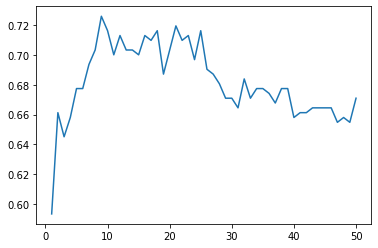

In [ ]:
import numpy as np
import seaborn as sns #para visualizacion
cvs = []  #Lista de valores cross value
for i in range (1,51):
  knn = KNeighborsClassifier(n_neighbors=i)
  score = cross_val_score(knn, df_scaled, df.Class_att, cv=10)
  cvs.append(np.mean(score))
print(cvs)
sns.lineplot(x = [i for i in range(1,51)], y = cvs) #Visualicación de los resultados por valor de k
#Como tenemos que maximizar la precision usaremos el valor máximo k=9 (0.725)

[0 0 0 ... 0 0 1]


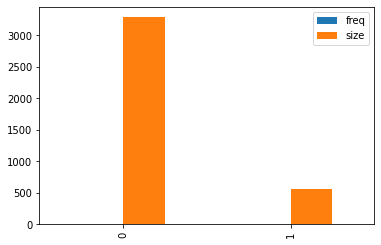

<Axes: >

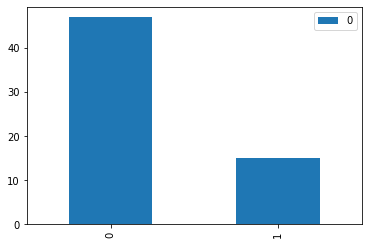

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import kneighbors_graph
from collections import Counter
#Para encontar el mejor valor de vecinos a recuperar usaremos validación cruzada
x_train, x_test, class_train, class_test = train_test_split(df_scaled, df.Class_att, test_size=0.2, random_state=420)
neigh = KNeighborsClassifier(n_neighbors=9)
neigh.fit(x_train, class_train)
class_pred = neigh.predict(x_test)
print(class_pred)
#Esta es la unica forma que se me ocurre de representar la distribución
g = kneighbors_graph(x_test, 9, mode='connectivity').toarray().flatten()
count = pd.DataFrame({'freq': g})
count.groupby('freq', as_index=False).size().plot(kind='bar')
plt.show()
count = Counter(class_pred)
counts = pd.DataFrame.from_dict(count, orient='index')
counts.plot(kind='bar')
#Podemos ver que ambas predicciones son muy similares (los valores de la primera son erroneos por eso ploteo de dos formas)

In [ ]:
from sklearn.metrics import confusion_matrix
#Árbol óptimo altura 7 (árbol completo)
neigh = KNeighborsClassifier(n_neighbors=9)
neigh.fit(x_train, class_train)
print("Valores recall:")
print(cross_val_score(neigh, df_scaled, df.Class_att, cv=10, scoring='recall'))
print("Valores precision:")
print(cross_val_score(neigh, df_scaled, df.Class_att, cv=10, scoring='precision'))
print("Valores F1:")
print(cross_val_score(neigh, df_scaled, df.Class_att, cv=10, scoring='f1'))
#Recall: valores entre 0.3 y 0.7, bastante bajos, en general no recupera todos los positivos (de hecho se deja muchos fuera)
#Si hacemos los calculos a mano con la matriz de confusion salen del 85% (40/47) que no está mal
#Precision: de nuevo parecen algo bajos aunque para algunas predicciones todos los positivos son verdaderos
#Calculando a mano da un 91% que es de hecho un valor muy bueno
#F1: los valores de f1 parecen rondando el 0.6 de media y no muy dispersos
#si lo calculamos con la fórmula obtenemos un 88%, también un valor muy sólido
#En general todas las predicciones son buenas por lo que podríamos plantearnos usar este modelo en predicciones reales
#Uno de sus mayores puntos fuertes es que el parametro más importante para nuestro caso, la precision, es del 91% (muy alta, mayor que el árbol)
#Otra ventaja es que se adapta muy bien a los nuevos datos que se añadan sin gran coste adicional en espacio o tiempo
#Una desventaja es que a diferencia del árbol de decisión no podemos saber que variables tienen más peso
class_pred = neigh.predict(x_test)
print("Matriz de confusion:")
confusion_matrix(class_test, class_pred)


Valores recall:
[0.7 0.5 0.5 0.4 0.4 0.5 0.7 0.5 0.3 0.6]
Valores precision:
[0.41176471 0.35714286 0.55555556 0.8        0.5        1.
 0.875      0.625      0.42857143 1.        ]
Valores F1:
[0.51851852 0.41666667 0.52631579 0.53333333 0.44444444 0.66666667
 0.77777778 0.55555556 0.35294118 0.75      ]
Matriz de confusion:


array([[40,  4],
       [ 7, 11]])

## 5) Resuelve el mismo problema usando un clasificador MLP

Optimiza el coeficiente de regularización


0.25 : 3.216083075988896
0.5 : 3.657686738218909
0.75 : 3.898154605197616
1.0 : 4.035078810143774
1.25 : 4.113858189383627
1.5 : 4.1577484539109815
1.75 : 4.179585419822808
2.0 : 4.186890410045198
2.25 : 4.184292871765362
2.5 : 4.174762274313289
2.75 : 4.160271371506502
3.0 : 4.142170937277843
3.25 : 4.12141041572716
3.5 : 4.098672590717993
3.75 : 4.0744584121996645
4.0 : 4.049141942645725
4.25 : 4.023006849987648
4.5 : 3.9962711961984567
4.75 : 3.9691046218932247
5.0 : 3.941640482139476


<Axes: >

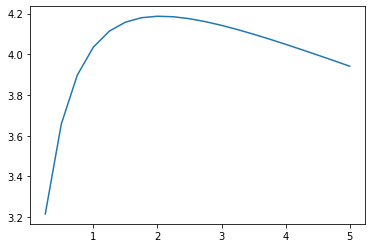

In [ ]:
from sklearn.linear_model import Ridge  #Usa la regularizacion L2 y como funcion de activación la tangente hiperbólica que es la que tiene mejor desempeño en clasificación
from statistics import mean

cvs = []
it = []

#Probaremos con 20 valores en intervalos de 0.25
for i in range(1, 21):
    mlp = Ridge(alpha = i * 0.25)
    mlp.fit(x_train, class_train)
    scores = cross_val_score(mlp,df_scaled, df.Class_att, cv = 10)
    avg_cross_val_score = mean(scores)*100
    cvs.append(avg_cross_val_score)
    it.append(i * 0.25)

#Mostramos los resultados de la regularización
for i in range(0, len(it)):
    print(str(it[i])+' : '+str(cvs[i]))
sns.lineplot(x = it, y = cvs)
#El valor óptimo será el más grande, en nuestro caso 2

Valor de precisión del modelo: 0.8387096774193549


<Axes: >

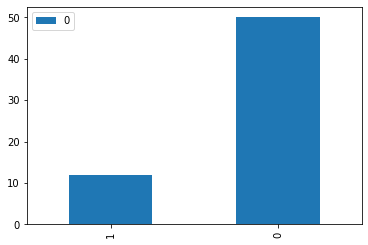

In [ ]:
from sklearn.linear_model import RidgeClassifier
x_train, x_test, class_train, class_test = train_test_split(df_scaled, df.Class_att, test_size=0.2, random_state=420)
mlp = RidgeClassifier(alpha = 2)  #Parametrom de regularizacion óptimo = 2
mlp.fit(x_train, class_train)
print("Valor de precisión del modelo: {}".format(mlp.score(x_test, class_test)))
class_pred = mlp.predict(x_test)
count = Counter(class_pred)
counts = pd.DataFrame.from_dict(count, orient='index')
counts.plot(kind='bar')
#Las predicciones parecen coincidir con el resto de modelos

In [ ]:
mlp = RidgeClassifier(alpha = 2)
mlp.fit(x_train, class_train)
print("Valores recall:")
print(cross_val_score(mlp, df_scaled, df.Class_att, cv=10, scoring='recall'))
print("Valores precision:")
print(cross_val_score(mlp, df_scaled, df.Class_att, cv=10, scoring='precision'))
print("Valores F1:")
print(cross_val_score(mlp, df_scaled, df.Class_att, cv=10, scoring='f1'))
#Recall: valores entre 0.2 y 0.8 pero en general muy bajos (muchos de ellos entre 0.2 y 0.4)
#Calculado con la fórmula sale un 84%
#Precision: valores entre 0.33 y 1, de los mejores en comparación con los otros modelos
#El cálculo con la formula nos da 95% de precisión, el mejor valor de todos
#F1: Valores entre 0.33 y 0.88, un poco por encima de la media
#El cálculo a mano da 89,4% también un valor muy alto, casi del 90%
#En cuanto a los valores de las métricas el MLP tiene los mejores números
#Ocupa menos en memoria que el árbol de decisión y si no contamos el tiempo de entrenamiento
#devuelve los resultados más rápidamente que knn
#En general, teniendo en cuenta que el valor más importante es la precisión, MLP parece el
#mejor modelo de clasificación y tiene unas métricas suficientemente altas como para poder
#usarse en un entorno profesional
class_pred = mlp.predict(x_test)
print("Matriz de confusion:")
confusion_matrix(class_test, class_pred)

Valores recall:
[0.6 0.4 0.5 0.2 0.5 0.4 0.8 0.2 0.3 0.3]
Valores precision:
[0.46153846 0.33333333 0.5        1.         0.83333333 1.
 1.         0.66666667 0.75       1.        ]
Valores F1:
[0.52173913 0.36363636 0.5        0.33333333 0.625      0.57142857
 0.88888889 0.30769231 0.42857143 0.46153846]
Matriz de confusion:


array([[42,  2],
       [ 8, 10]])